In [131]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [132]:
df = pd.read_csv('mydata.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [133]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
  df[col] = df[col].str.lower().str.replace(' ', '_')

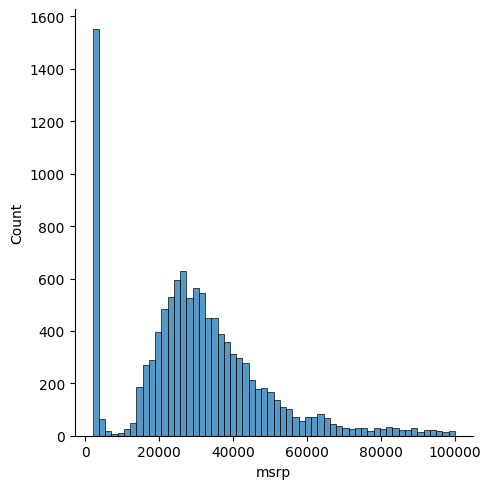

In [134]:
sns.displot(df.msrp[df.msrp < 100000], kde=False)

In [135]:
log_price = np.log1p(df.msrp)

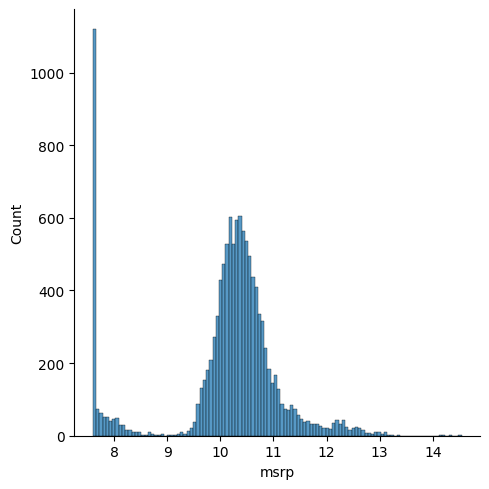

In [136]:
sns.displot(log_price, kde=False)

In [137]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [138]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


In [139]:
# Our initial analysis showed a long tail in the distribution of prices, and to remove its effect, we need to apply the log 
# transformation. We can do that for each dataframe separately: 
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [140]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [141]:
# Linear regression implemented with Numpy
def linear_regression(X, y):
  # adding the dummy column
  ones = np.ones(X.shape[0])   # A Create an array that contains only 1s.
  X = np.column_stack([ones, X])  # Add the array of 1s as the first column of X. 

  # normal equation formula
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]   #Split the weights vector into the bias and the rest of the weights. 


In [142]:
# Linear regression with regularization. (ridge regression)
def linear_regression_reg(X, y, r=0.0):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  reg = r * np.eye(XTX.shape[0])
  XTX = XTX + reg

  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]

In [143]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 
 'popularity'] 
df_num = df_train[base]

In [144]:
X_train = df_num.values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [145]:
w_0, w = linear_regression(X_train, y_train)

In [146]:
y_pred = w_0 + X_train.dot(w)

C:\Users\user\AppData\Local\Temp\ipykernel_1468\4039530517.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(y_pred, label='prediction', color='blue')


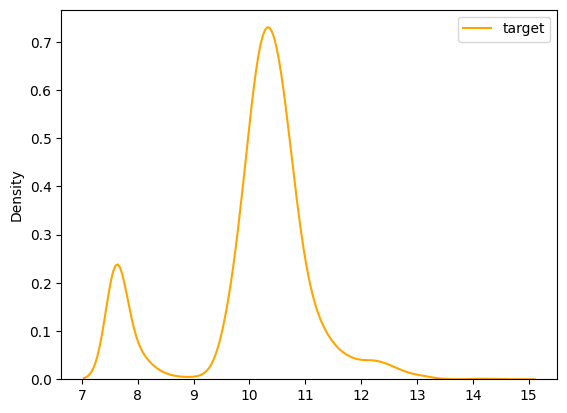

In [147]:
sns.kdeplot(y_pred, label='prediction', color='blue')
sns.kdeplot(y_train, label='target', color='orange')

plt.legend()
plt.show()


In [148]:
# The implementation of root mean squared error
def rmse(y, y_pred):
  error = y_pred - y
  mse = (error ** 2).mean()
  return np.sqrt(mse)

In [149]:
y_pred.shape

(7150,)

In [150]:
df_num = df_val[base]
df_num = df_num.fillna(0)
X_val = df_num.values


In [151]:
def prepare_X(df):
  df_num = df[base]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [152]:
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))


validation: 0.761653099130156


In [153]:
df_train['age'] = 2017 - df_train.year
df_train.year.max()

2017

In [154]:
# Creating the "age" feature in the prepare_X function
def prepare_X(df):
  df =df.copy()
  features = base.copy()

  df['age'] = 2017 - df.year
  features.append('age')

  for v in [2, 3, 4]:
   feature = 'num_doors_%s' % v
   value = (df['number_of_doors'] == v).astype(int)
   df[feature] = value
   features.append(feature)

  for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
    feature = 'is_make_%s' %v
    df[feature] = (df['make'] == v).astype(int)
    features.append(feature)

  for v in ['regular_unleaded', 'premium_unleaded_(required)', 
            'premium_unleaded_(recommended)', 
            'flex-fuel_(unleaded/e85)']: #A 
    feature = 'is_type_%s' % v 
    df[feature] = (df['engine_fuel_type'] == v).astype(int) 
    features.append(feature) 

  for v in ['automatic', 'manual', 'automated_manual', 'direct_drive']:
    feature = 'is_transmission_%s' %v
    df[feature] = (df['transmission_type'] == v).astype(int)
    features.append(feature)

  for v in ['front_wheel_drive', 'rear_wheel_drive',
            'all_wheel_drive', 'four_wheel_drive']:
    feature = 'is_driven_wheels_%s' %v
    df[feature] = (df['driven_wheels'] == v).astype(int)
    features.append(feature)

  for v in ['crossover', 'flex_fuel', 'luxury',
            'luxury,performance', 'hatchback', 'performance']: #D 
    feature = 'is_mc_%s' % v 
    df[feature] = (df['market_category'] == v).astype(int) 
    features.append(feature) 
 
  for v in ['compact', 'midsize', 'large']: #E 
    feature = 'is_size_%s' % v 
    df[feature] = (df['vehicle_size'] == v).astype(int) 
    features.append(feature) 
 
  for v in ['sedan', '4dr_suv', 'coupe', 'convertible', 
            '4dr_hatchback']: #F 
    feature = 'is_style_%s' % v 
    df[feature] = (df['vehicle_style'] == v).astype(int) 
    features.append(feature)

  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [155]:
df['engine_fuel_type'].value_counts().head(16)

engine_fuel_type
regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: count, dtype: int64

In [156]:
# Let’s test if adding the feature “age” leads to any improvements:
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)

X_val  = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 85.3929675166265


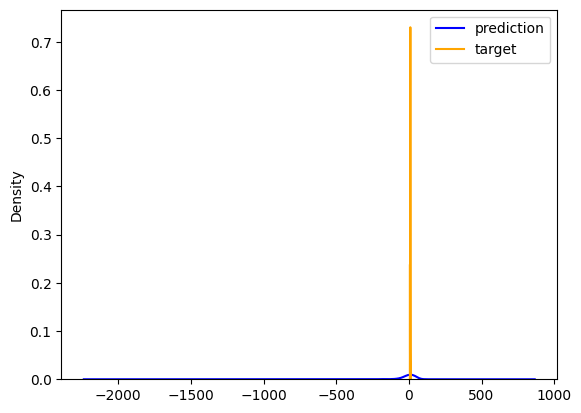

In [157]:
sns.kdeplot(y_pred, label='prediction', color='blue')
sns.kdeplot(y_train, label='target', color='orange')

plt.legend()
plt.show()


In [158]:
df['make'].value_counts().head(5)

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [159]:
# Let's run a Grid search 
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 1000]:
  w_0, w = linear_regression_reg(X_train, y_train, r=r)
  y_pred = w_0 + X_val.dot(w)
  print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.4569953601939228
0.0001 0.4569956024771023
 0.001 0.4569961126788991
  0.01 0.457001258888312
   0.1 0.4570544922849402
     1 0.45771547249625727
     5 0.46262959710787765
    10 0.47042690096040685
  1000 0.9242125286410521


In [160]:
X_train = prepare_X(df_train) 
w_0, w = linear_regression_reg(X_train, y_train, r=0.01) 

X_val = prepare_X(df_val) 
y_pred = w_0 + X_val.dot(w) 
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.457001258888312
test: 0.452827662952973


In [161]:
# Linear regression with regularization. (ridge regression)
def linear_regression_reg(X, y, r=0.0):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  reg = r * np.eye(XTX.shape[0])
  XTX = XTX + reg

  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]

In [162]:
# The prepare_X function for converting a dataframe into a matrix

In [163]:
# Suppose that a user posts the following ad on our website: 
ad = { 
 'city_mpg': 18, 
 'driven_wheels': 'all_wheel_drive', 
 'engine_cylinders': 6.0, 
 'engine_fuel_type': 'regular_unleaded', 
 'engine_hp': 268.0, 
 'highway_mpg': 25, 
 'make': 'toyota', 
 'market_category': 'crossover,performance', 
 'model': 'venza', 
 'number_of_doors': 4.0, 
 'popularity': 2031, 
 'transmission_type': 'automatic', 
 'vehicle_size': 'midsize', 
 'vehicle_style': 'wagon', 
 'year': 2013 
} 

In [164]:
df_test = pd.DataFrame([ad])
X_test = prepare_X(df_test)

In [165]:
# This prediction is not the final price, however; it's the logarithm of the price. 
y_pred = w_0 + X_test.dot(w)

# To get the actual price, we need to undo the logarithm and apply the exponent function:
suggestion = np.expm1(y_pred)
suggestion

array([28999.96507392])